In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Covid_logistic_regression/Covid_data.csv')

In [3]:
df.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [4]:
df['Contact_with_covid_patient'] = df['Contact_with_covid_patient'].str.lower()

In [5]:
gender_lab = LabelEncoder()
gender = gender_lab.fit_transform(df['Gender'])

In [6]:
severity_lab = LabelEncoder()
severity = severity_lab.fit_transform(df['Severity'])

In [7]:
contact_lab = LabelEncoder()
contact = contact_lab.fit_transform(df['Contact_with_covid_patient'])

In [8]:
gender_onehot = OneHotEncoder(sparse=False)
gender = gender_onehot.fit_transform(gender.reshape(-1,1))

In [9]:
severity_onehot = OneHotEncoder(sparse=False)
severity = severity_onehot.fit_transform(severity.reshape(-1,1))

In [10]:
contact_onehot = OneHotEncoder(sparse=False)
contact = contact_onehot.fit_transform(contact.reshape(-1,1))

In [11]:
df_updated = df.drop('Gender',axis=1)

In [12]:
df_updated = df_updated.drop('Severity',axis=1)
df_updated = df_updated.drop('Contact_with_covid_patient',axis=1)

In [13]:
df_updated.head()

,Country,Age,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Infected
0,China,10,102,1,0,0,0,1,0
1,Italy,20,103,1,1,0,0,0,1
2,Iran,55,99,0,0,0,1,1,0
3,Republic of Korean,37,100,0,1,1,0,0,1
4,France,45,101,1,1,1,1,0,1


In [14]:
X = df_updated.iloc[:,1:-1].values
y = df['Infected'].values

In [15]:
X = np.c_[X,gender,severity,contact]

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [18]:
dt = DecisionTreeClassifier(criterion='entropy')

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred = dt.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.9408

In [23]:
from sklearn import tree

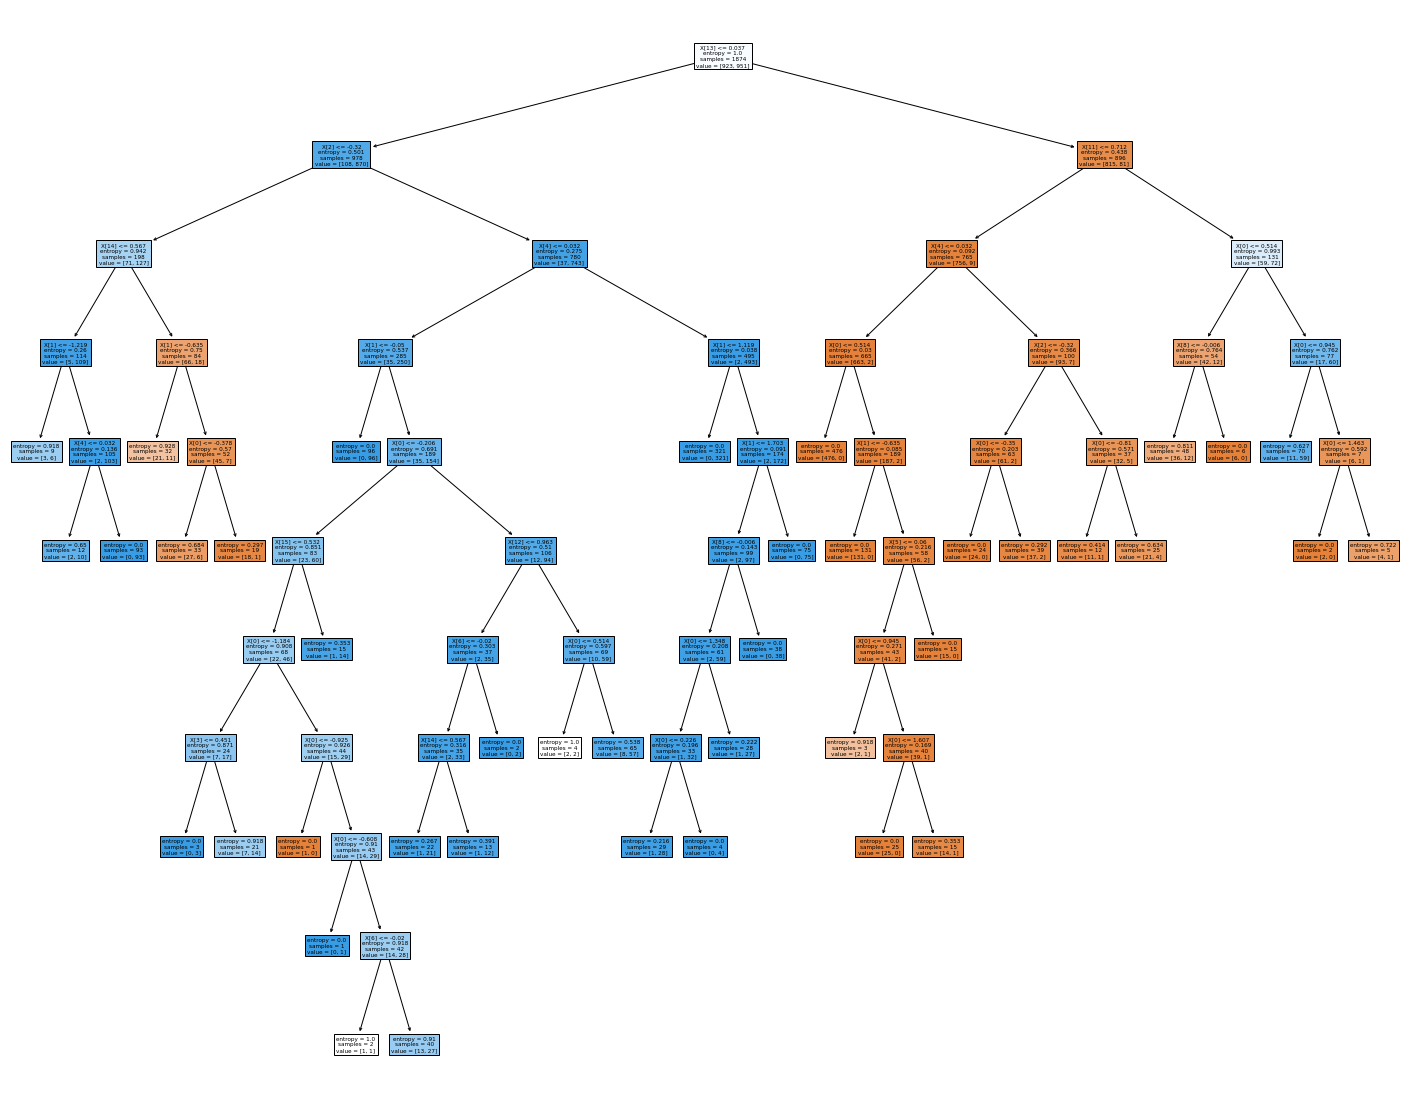

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)

In [25]:
fig.savefig('tree_covid_19.png')

In [27]:
path = dt.cost_complexity_pruning_path(x_train, y_train)

In [28]:
alphas = path['ccp_alphas']

In [29]:
for c in alphas:
    dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=c)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Acc : {}, Alpha : {}".format(acc, c))

Acc : 0.9408, Alpha : 0.0
Acc : 0.9408, Alpha : 5.324209677201033e-05
Acc : 0.9408, Alpha : 5.5978439379918664e-05
Acc : 0.9408, Alpha : 8.80305661432497e-05
Acc : 0.9424, Alpha : 9.550700589215991e-05
Acc : 0.9424, Alpha : 0.00016893969273029316
Acc : 0.9424, Alpha : 0.0002839215451651445
Acc : 0.9424, Alpha : 0.0003076529639250772
Acc : 0.9424, Alpha : 0.0005917731086004114
Acc : 0.9424, Alpha : 0.0007538663723597253
Acc : 0.9424, Alpha : 0.0007538689693400852
Acc : 0.9424, Alpha : 0.0007554546514101064
Acc : 0.9424, Alpha : 0.0007716367313476465
Acc : 0.9424, Alpha : 0.0008136865848834235
Acc : 0.9424, Alpha : 0.0008750644467384779
Acc : 0.9376, Alpha : 0.0010151067616570846
Acc : 0.9376, Alpha : 0.0012410316848597246
Acc : 0.9376, Alpha : 0.0014186624583934458
Acc : 0.9376, Alpha : 0.0016155240690623688
Acc : 0.9376, Alpha : 0.0018375304677808561
Acc : 0.9376, Alpha : 0.001929772910496834
Acc : 0.9376, Alpha : 0.0019319230197771334
Acc : 0.9376, Alpha : 0.0019428568169405948
Acc : 

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
random_dt = RandomForestClassifier(n_estimators=10)
random_dt.fit(x_train, y_train)
y_pred = random_dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [40]:
acc

0.936

In [41]:
random_dt.feature_importances_

array([2.93622537e-02, 3.84761299e-02, 9.21584773e-02, 1.69733264e-02,
       5.14735685e-02, 2.38387981e-02, 1.51304443e-02, 1.86904132e-02,
       5.88068250e-03, 3.18057205e-06, 4.45239346e-02, 4.12167527e-02,
       2.58246892e-03, 3.81536924e-01, 7.13222606e-02, 1.66830385e-01])

<BarContainer object of 16 artists>

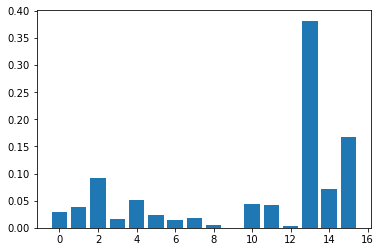

In [42]:
plt.bar([i for i in range(16)],random_dt.feature_importances_)

In [43]:
random_dt.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
random_dt.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1225640658, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1876504326, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 